In [3]:
!pip install feature_engine
!pip install category_encoders
# data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.titlepad'] = 12
plt.rcParams['figure.dpi'] = 150
mpl.rcParams['font.family'] = 'Serif'

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from feature_engine.discretisation import EqualFrequencyDiscretiser
from category_encoders.woe import WOEEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import pickle

     -------------------------------------- 81.2/81.2 kB 266.7 kB/s eta 0:00:00


In [4]:
data = pd.read_csv('C:/Users/User/Medical Datasets/diabetes.csv')
all_features = [i for i in data.columns]
features = [i for i in data.columns if i != 'Outcome']
target = 'Outcome'

In [8]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


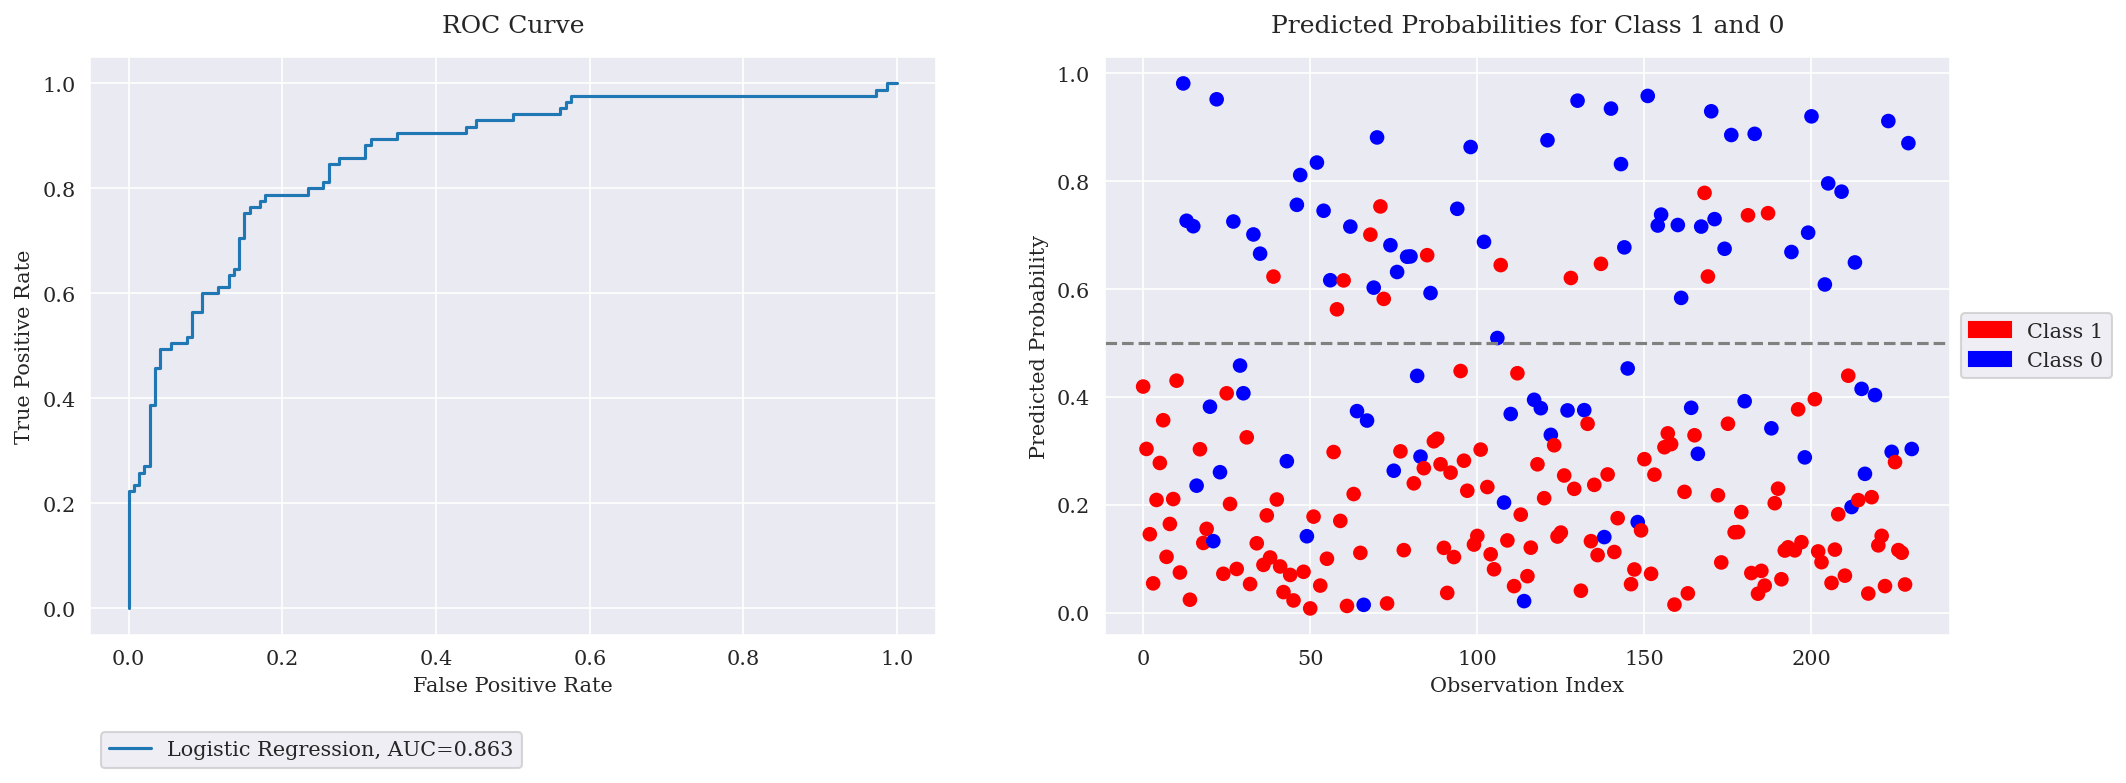

'The AUC : 0.863'

In [12]:
def logistic_regression_model(X, y):
    """
    This function takes in two inputs: 
    X - a pandas dataframe with features used for prediction
    y - a pandas series with binary target values 
    
    The function performs the following steps:
    1. Splits the data into training and testing sets (70-30)
    2. Fits a logistic regression model on the training data
    3. Predicts binary target values on the testing data
    4. Computes the ROC AUC score and creates a ROC curve plot
    5. Creates a scatter plot of the predicted probabilities for class 1 and 0
    
    Returns the ROC AUC score, ROC curve plot and scatter plot of predicted probabilities
    """
    
    # Split the data into training and testing sets (70-30)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    # Fit a logistic regression model on the training data
    logistic_reg = LogisticRegression()
    logistic_reg.fit(X_train, y_train)
    
    # Predict binary target values on the testing data
    y_pred_prob = logistic_reg.predict_proba(X_test)[:, 1]
    
    # Compute the ROC AUC score
    auc = round(roc_auc_score(y_test, y_pred_prob),3)
    filename = 'diabetes.sav'
    pickle.dump(logistic_reg, open(filename, 'wb'))
    plt.figure(figsize=(16, 5))

    # ROC curve
    ax1 = plt.subplot(1, 2, 1)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label="Logistic Regression, AUC="+str(auc))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='center left', bbox_to_anchor=(0, -0.2))

    # Predicted Probabilities for Class 1 and 0
    ax2 = plt.subplot(1, 2, 2)
    plt.scatter(range(len(y_pred_prob)), y_pred_prob, c=y_test, cmap='bwr_r')
    plt.xlabel('Observation Index')
    plt.ylabel('Predicted Probability')
    plt.title('Predicted Probabilities for Class 1 and 0')
    red_patch = mpatches.Patch(color='red', label='Class 1')
    blue_patch = mpatches.Patch(color='blue', label='Class 0')
    plt.legend(handles=[red_patch, blue_patch], loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.axhline(y=0.5, color='gray', linestyle='--')

    plt.show()
    
    return f"The AUC : {auc}"


features = [i for i in data.columns if i != 'Outcome']
target = 'Outcome'

logistic_regression_model(data[features],data[target])

NameError: name 'logistic_reg' is not defined

In [7]:
train_data.describe(include='all').head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.826816,120.292365,69.411546,20.992551,82.938547,31.918250,0.487696,33.510242,0.340782
std,3.366010,32.424974,19.042277,16.078862,121.659981,8.021448,0.349046,12.026571,0.474414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.247000,24.000000,0.000000
